### Notebook to create collage with images from the experiments

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import cv2
import imageio 
import shutil
from pathlib import Path

%load_ext autoreload
%autoreload 2

# BGR
TUM_BLUE = (189, 101, 0)
TUM_ORANGE = (34, 114, 227)
TUM_GREEN = (0, 172, 162)
TUM_LIGHTER_BLUE = (234, 198, 152)

SHAPE = (480, 360)
FORMAT = 360/480

In [ ]:
novel_view=True

In [7]:
rgb_dir, depth_dir, gt_dir, gt_depth_dir = [f"renderonly_test_399999/{_}" for _ in ["estim", "estim_depth", "gt", "gt_depth"]]

dnerf_human = "logs/report_johannes_01_dnerf/"
mse_dgs_human = "logs/report_johannes_05_mse_dgs/"
human_img = "011.png"

dnerf_bottle = "logs/bottle_02_dnerf/"
mse_dgs_bottle = "logs/bottle_04_mse_dgs_hardcoded_halfsamples/"
bottle_img = "004.png"

if novel_view==False:
    dnerf_gobblet = "logs/gobblet_06_dnerf/"
    mse_dgs_gobblet = "logs/gobblet_05_mse_dgs_hardcoded/"
    gobblet_img = "004.png"
else: 
    gobblet = "logs/gobblet_custom_novel_view_images/"
    gobblet_img = "000.png"

paths = [
    [   
        os.path.join(dnerf_human, rgb_dir, human_img),
        os.path.join(mse_dgs_human, rgb_dir, human_img),
        os.path.join(dnerf_human, gt_dir, human_img),
        os.path.join(dnerf_human, depth_dir, human_img),
        os.path.join(mse_dgs_human, depth_dir, human_img),
        os.path.join(dnerf_human, gt_depth_dir, human_img),
        ],
]
rgb_dir, depth_dir, gt_dir, gt_depth_dir = [f"renderonly_test_400000/{_}" for _ in ["estim", "estim_depth", "gt", "gt_depth"]]

paths.append([
        os.path.join(dnerf_bottle, rgb_dir, bottle_img),
        os.path.join(mse_dgs_bottle, rgb_dir, bottle_img),
        os.path.join(dnerf_bottle, gt_dir, bottle_img),
        os.path.join(dnerf_bottle, depth_dir, bottle_img),
        os.path.join(mse_dgs_bottle, depth_dir, bottle_img),
        os.path.join(dnerf_bottle, gt_depth_dir, bottle_img),    
    ])

if novel_view==False:
    paths.append([
            os.path.join(dnerf_gobblet, rgb_dir, gobblet_img),
            os.path.join(mse_dgs_gobblet, rgb_dir, gobblet_img),
            os.path.join(dnerf_gobblet, gt_dir, gobblet_img),
            os.path.join(dnerf_gobblet, depth_dir, gobblet_img),
            os.path.join(mse_dgs_gobblet, depth_dir, gobblet_img),
            os.path.join(dnerf_gobblet, gt_depth_dir, gobblet_img),    
        ])
else:
    rgb_dnerf_dir, depth_dnerf_dir, rgb_ours_dir, depth_ours_dir, gt_dir, gt_depth_dir = [f"{_}" for _ in ["estim_dnerf", "estim_dnerf_depth", "estim_ours", "estim_ours_depth", "gt", "gt_depth"]]
    paths.append([
            os.path.join(gobblet, rgb_dnerf_dir, gobblet_img),
            os.path.join(gobblet, rgb_ours_dir, gobblet_img),
            os.path.join(gobblet, gt_dir, gobblet_img),
            os.path.join(gobblet, depth_dnerf_dir, gobblet_img),
            os.path.join(gobblet, depth_ours_dir, gobblet_img),
            os.path.join(gobblet, gt_depth_dir, gobblet_img), 
    ])

logs/report_johannes_01_dnerf/renderonly_test_399999/estim/011.png
logs/report_johannes_05_mse_dgs/renderonly_test_399999/estim/011.png
logs/report_johannes_01_dnerf/renderonly_test_399999/gt/011.png
logs/report_johannes_01_dnerf/renderonly_test_399999/estim_depth/011.png
logs/report_johannes_05_mse_dgs/renderonly_test_399999/estim_depth/011.png
logs/report_johannes_01_dnerf/renderonly_test_399999/gt_depth/011.png
logs/bottle_02_dnerf/renderonly_test_400000/estim/004.png
logs/bottle_04_mse_dgs_hardcoded_halfsamples/renderonly_test_400000/estim/004.png
logs/bottle_02_dnerf/renderonly_test_400000/gt/004.png
logs/bottle_02_dnerf/renderonly_test_400000/estim_depth/004.png
logs/bottle_04_mse_dgs_hardcoded_halfsamples/renderonly_test_400000/estim_depth/004.png
logs/bottle_02_dnerf/renderonly_test_400000/gt_depth/004.png
logs/gobblet_custom_novel_view_images/estim_dnerf/000.png
logs/gobblet_custom_novel_view_images/estim_ours/000.png
logs/gobblet_custom_novel_view_images/gt/000.png
logs/gobbl

/home/kirwul/miniconda3/envs/dgdnerf/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


logs/gobblet_custom_novel_view_images/estim_ours_depth/000.png
logs/gobblet_custom_novel_view_images/gt_depth/000.png


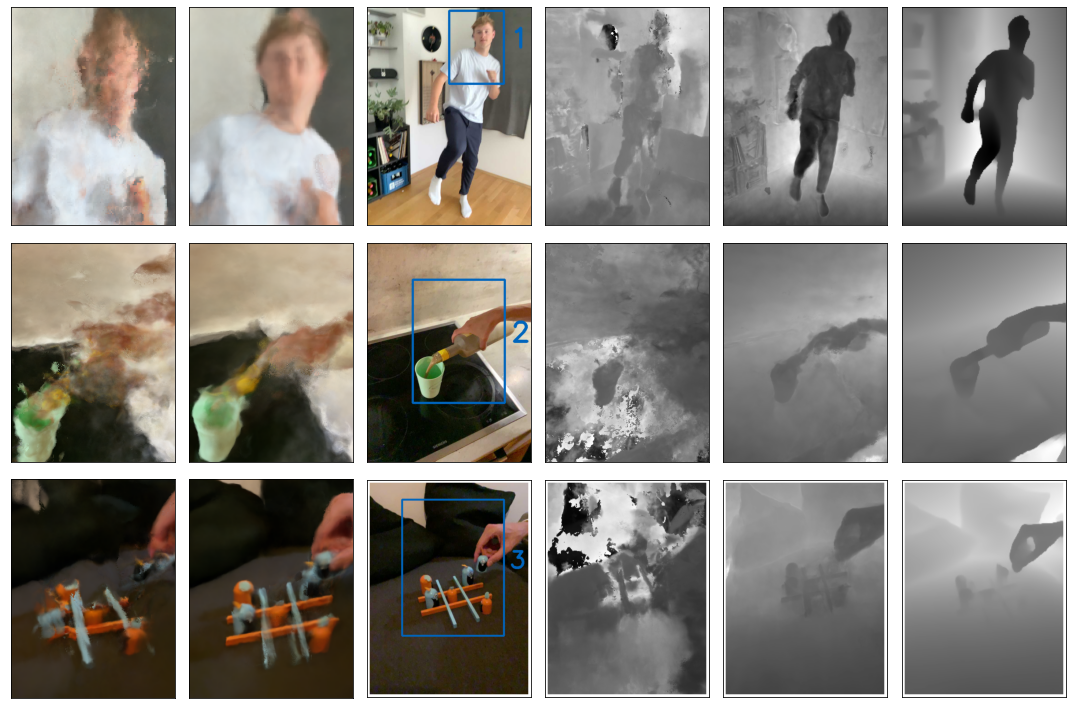

In [8]:
fig, ax = plt.subplots(3, 6, figsize=(15, 10))
copy_dir = Path(f"REPORT_COMPARISON_FIGURES_novel")
copy_dir.mkdir(parents=True, exist_ok=True)

def up_low(w, ho, h1):
    width = (w, int(w + FORMAT * (h1 - h0)))
    upper_left = (width[0], h0)
    lower_right = (width[1], h1)

    return upper_left, lower_right

for row in range(3):
    for col in range(6):
        img_path = paths[row][col]
        print(img_path)
        img_arr = imageio.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR)
        
        if row == 0:        # human
            h0, h1 = 10, 170
            w = 180
            upper_left, lower_right = up_low(w, h0, h1)
            text_loc = (int(lower_right[0] + 15), (upper_left[1]+lower_right[1])//2)
            text = "1"

        if row == 1:        # bottle
            h0, h1 = 80, 350
            w = 100
            upper_left, lower_right = up_low(w, h0, h1)
            text_loc = (int(lower_right[0] + 15), (upper_left[1]+lower_right[1])//2)
            text = "2"
        if row == 2:
            h0, h1 = 50, 400
            w = 90
            upper_left, lower_right = up_low(w, h0, h1)
            text_loc = (int(lower_right[0] + 15), (upper_left[1]+lower_right[1])//2)
            text = "3"
        
        if col in [3, 4, 5]:        # if depth
            pass
        elif col not in [2]:       # if not GT
            img_arr = img_arr[upper_left[1]:lower_right[1], upper_left[0]:lower_right[0], ]
        else:
            cv2.rectangle(img_arr, upper_left, lower_right, color=TUM_BLUE, thickness=3)    
            cv2.putText(img_arr, text, text_loc, cv2.FONT_HERSHEY_SIMPLEX, 2, TUM_BLUE, 5)

        # shutil.copyfile(img_path, f"{copy_dir}/")
        cv2.imwrite(os.path.join(copy_dir, f"r{row}_c{col}.png"), img_arr)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

        ax[row, col].imshow(img_arr)
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

fig.tight_layout()


In [9]:
text_loc

(367, 225)

In [10]:
img_arr.shape

(558, 422, 3)